# Assignment 5: Block Matching and Harris Corner Detection
## Ex. 5.1 Dense Optical Flow by Block Matching
* implement the block matching method as shown in the lecture
* take two frames from the datasets "lane_detection" or "copter_flight" with variable distances in time (1, 2, x) and compute the vector flow field
* display a subset of flow vectors on the gray-value version of the first image, by drawing a respective line. adjust the grid density such that not too many vectors overlap (**RESULT**)

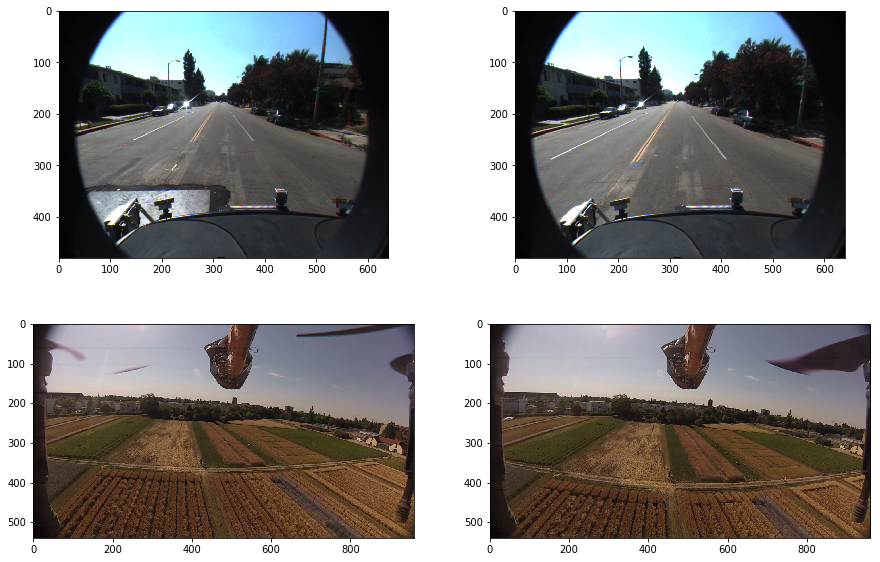

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

# Chose other images if you like
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00001.png')

# Footage from our Neurocopter project:
# http://berlinbiorobotics.blog/projects/neurocopter/
copter1 = io.imread('images/copter_flight/frame050.jpg')
copter2 = io.imread('images/copter_flight/frame052.jpg') 

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax21 = plt.subplot(2, 2, 3)
ax22 = plt.subplot(2, 2, 4)

ax11.imshow(lane1)
ax12.imshow(lane2)

ax21.imshow(copter1)
ax22.imshow(copter2)

In [2]:
"""
for each pixel 𝑥, 𝑦 in 𝐼
    iterate over all Δ𝑥, Δ𝑦 in a window 𝑊 around 𝑥, 𝑦
        compute the (windowed) SSD between 
        𝐼_𝑡(𝑥,𝑦) and 𝐼_{𝑡+1}(𝑥+Δ𝑥,𝑦+Δ𝑦)
    store the flow vector Δ𝑥, Δ𝑦 for the position 𝑥, 𝑦


def get_window(image, x, y, window_size):
   
    :param window_size: (height, width) values should be odd
    
    
    delta_y, delta_x = window_size // 2
    im_h, im_w = image.shape
    y_min, y_max = np.clip(np.array([y - delta_y, y + delta_y]), 0, im_h - 1)
    x_min, x_max = np.clip(np.array([x - delta_x, x + delta_x]), 0, im_w - 1)
    return image[y_min:y_max, x_min:x_max]


def calc_flow(x, y, block, search_window):
    flow_vector = None
    min_ssd = None
    y_min, y_max = [1,2]
    x_min, x_max = [1,2]
    for yi in range(y_min, y_max):
        for xi in range(x_min, x_max):
            v = np.array([xi, yi]) - np.array([x, y])
            ssd = None
    return flow_vector


# def calc_windowed_ssd(x, y, block_size, image):
#     pass

store = {}
block_size = (11, 11)
search_window_size = (100, 100)
pois = [(5, 5)]
sequence = [lane1, lane2]
for t, image in enumerate(sequence):
    if t == 0:
        continue
        
    im_h, im_w = image.shape
    for y in range(im_h):
        for x in range(im_w):
            block = get_window(sequence[t - 1], x, y, block_size)
            search_window = get_window(image, x, y, search_window_size)
            flow_vector = calc_flow(x, y, block, search_window)
            store[(x, y)] = flow_vector
    min_ssd = None

None
"""

'\nfor each pixel \xf0\x9d\x91\xa5, \xf0\x9d\x91\xa6 in \xf0\x9d\x90\xbc\n    iterate over all \xce\x94\xf0\x9d\x91\xa5, \xce\x94\xf0\x9d\x91\xa6 in a window \xf0\x9d\x91\x8a around \xf0\x9d\x91\xa5, \xf0\x9d\x91\xa6\n        compute the (windowed) SSD between \n        \xf0\x9d\x90\xbc_\xf0\x9d\x91\xa1(\xf0\x9d\x91\xa5,\xf0\x9d\x91\xa6) and \xf0\x9d\x90\xbc_{\xf0\x9d\x91\xa1+1}(\xf0\x9d\x91\xa5+\xce\x94\xf0\x9d\x91\xa5,\xf0\x9d\x91\xa6+\xce\x94\xf0\x9d\x91\xa6)\n    store the flow vector \xce\x94\xf0\x9d\x91\xa5, \xce\x94\xf0\x9d\x91\xa6 for the position \xf0\x9d\x91\xa5, \xf0\x9d\x91\xa6\n\n\ndef get_window(image, x, y, window_size):\n   \n    :param window_size: (height, width) values should be odd\n    \n    \n    delta_y, delta_x = window_size // 2\n    im_h, im_w = image.shape\n    y_min, y_max = np.clip(np.array([y - delta_y, y + delta_y]), 0, im_h - 1)\n    x_min, x_max = np.clip(np.array([x - delta_x, x + delta_x]), 0, im_w - 1)\n    return image[y_min:y_max, x_min:x_max]\n\n\

## Ex. 5.2 Harris Corner Detection
* implement the Harris Corner Detector as discussed in the lecture
* compute corners in the first image and track them with Lucas-Kanade (use e.g. the function "calcOpticalFlowPyrLK" in OpenCV)
* mark the positions of your Harris corners and draw the flow vectors found by Lucas-Kanade on the gray-value versions of the first image (**RESULT**)

In [3]:
from skimage import filters

im = color.rgb2gray(copter1)
im_width, im_height = im.shape
H = np.empty([im_width, im_height, 4])
R = np.empty([im_width, im_height])
k = 0.04

print(im_width, im_height)

# 1) Compute derivations of I
I_x = filters.sobel_h(im)
I_y = filters.sobel_v(im)

# 2) Compute products of derivatives at every pixel
I_x2 = I_x*I_x
I_y2 = I_y*I_y
I_xy = I_x*I_y

# 3) Compute sums of products at every pixel
S_x2 = filters.sobel(I_x2)
S_y2 = filters.sobel(I_y2)
S_xy = filters.sobel(I_xy)

# 4) Define matrix at each pixel
for x in range(im_width):
    for y in range(im_height):
        H[x][y][0] = S_x2[x][y]
        H[x][y][1] = S_xy[x][y]
        H[x][y][2] = S_xy[x][y]
        H[x][y][3] = S_y2[x][y]
        
# 5) Compute detector response: R = det H - k* trace H **2            det=ad-bc    trace=a+d
for x in range(im_width):
    for y in range(im_height):
        det = (H[x][y][0]*H[x][y][3]) - (H[x][y][1]*H[x][y][2]) # second term always zero therefore obsolet, right?
        trace = H[x][y][0]+H[x][y][3]
        R[x][y] = det - k*(np.power(trace,2))



(540, 960)


(0.06350638982074053, 0.0)
180


"    \nprint(result.max())\nresult[result <= 0.03] = 0\nprint(np.count_nonzero(result))  \n        \nfor dot in ...\npatches = Circle((cy, cx), radius=3, color='red')\n"

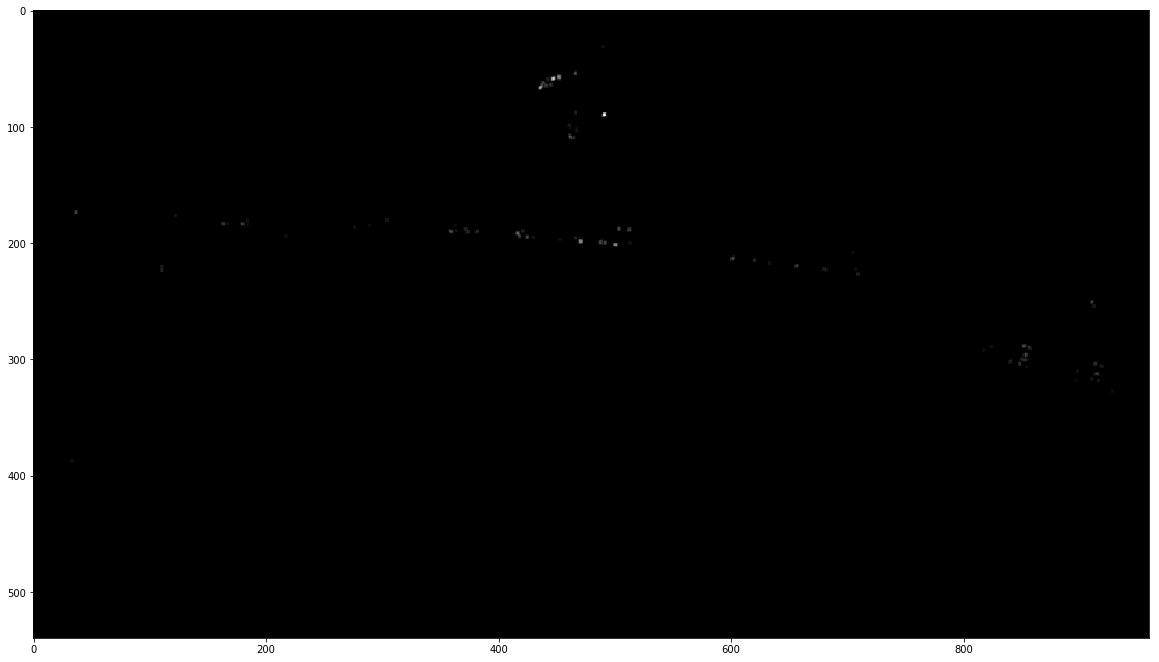

In [4]:
# 6) Threshold the value of R. Compute nonmax suppression
R[R <= 0.005] = 0
rmax = R.max()
rmin = R.min()
print(rmax, rmin)
print(np.count_nonzero(R))

kernel_size = 3
result = np.zeros([im_width, im_height])

LC_vec = []

for x in range(im_width-(kernel_size-1)):
    for y in range(im_height-(kernel_size-1)):
        R_window = R[x:x+kernel_size,y:y+kernel_size]
        score = np.sum(R_window)
        result[x+1][y+1] = score

#second Treshold to reduce LC vector length 
#result[result <= 0.04] = 0
#print(np.count_nonzero(result))

for x in range(im_width):
    for y in range(im_height):
        if(result[x][y] != 0.0):
           LC_vec.append((x,y)) 

# print(len(LC_vec))
# print(LC_vec)


fig = plt.figure(figsize=(20, 15))
plt.imshow(result, cmap='gray')


"""    
print(result.max())
result[result <= 0.03] = 0
print(np.count_nonzero(result))  
        
for dot in ...
patches = Circle((cy, cx), radius=3, color='red')
"""



In [5]:
# Get most valuable Harris Corner
corner = np.argmax(result)
corner_x = corner / im_height
corner_y = corner % im_height

HC = (corner_y, corner_x)
print(HC)

(491, 89)


In [6]:
# OpenCV
import cv2
print(cv2.__version__)

4.1.2


In [7]:
nextPts, status, err = cv2.CalcOpticalFlowPyrLK(copter1, copter2, LC_vec)

AttributeError: 'module' object has no attribute 'CalcOpticalFlowPyrLK'